# BI8040 - notebook project - Eirini & Vasundra

## Model of interest: Mammalian cell cycle
Publication: [Logical model specification aided by model-checking techniques: application to the mammalian cell cycle regulation](https://doi.org/10.1093/bioinformatics/btw457)

In [2]:
import ginsim 
import biolqm
import maboss
import pypint
from colomoto_jupyter import tabulate
from itertools import combinations
import matplotlib.pyplot as plt

This notebook has been executed using the docker image `colomoto/colomoto-docker:2018-08-17`

You are using Pint version 2018-07-10 and pypint 1.4.2

In [3]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml")

Downloading 'http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml'

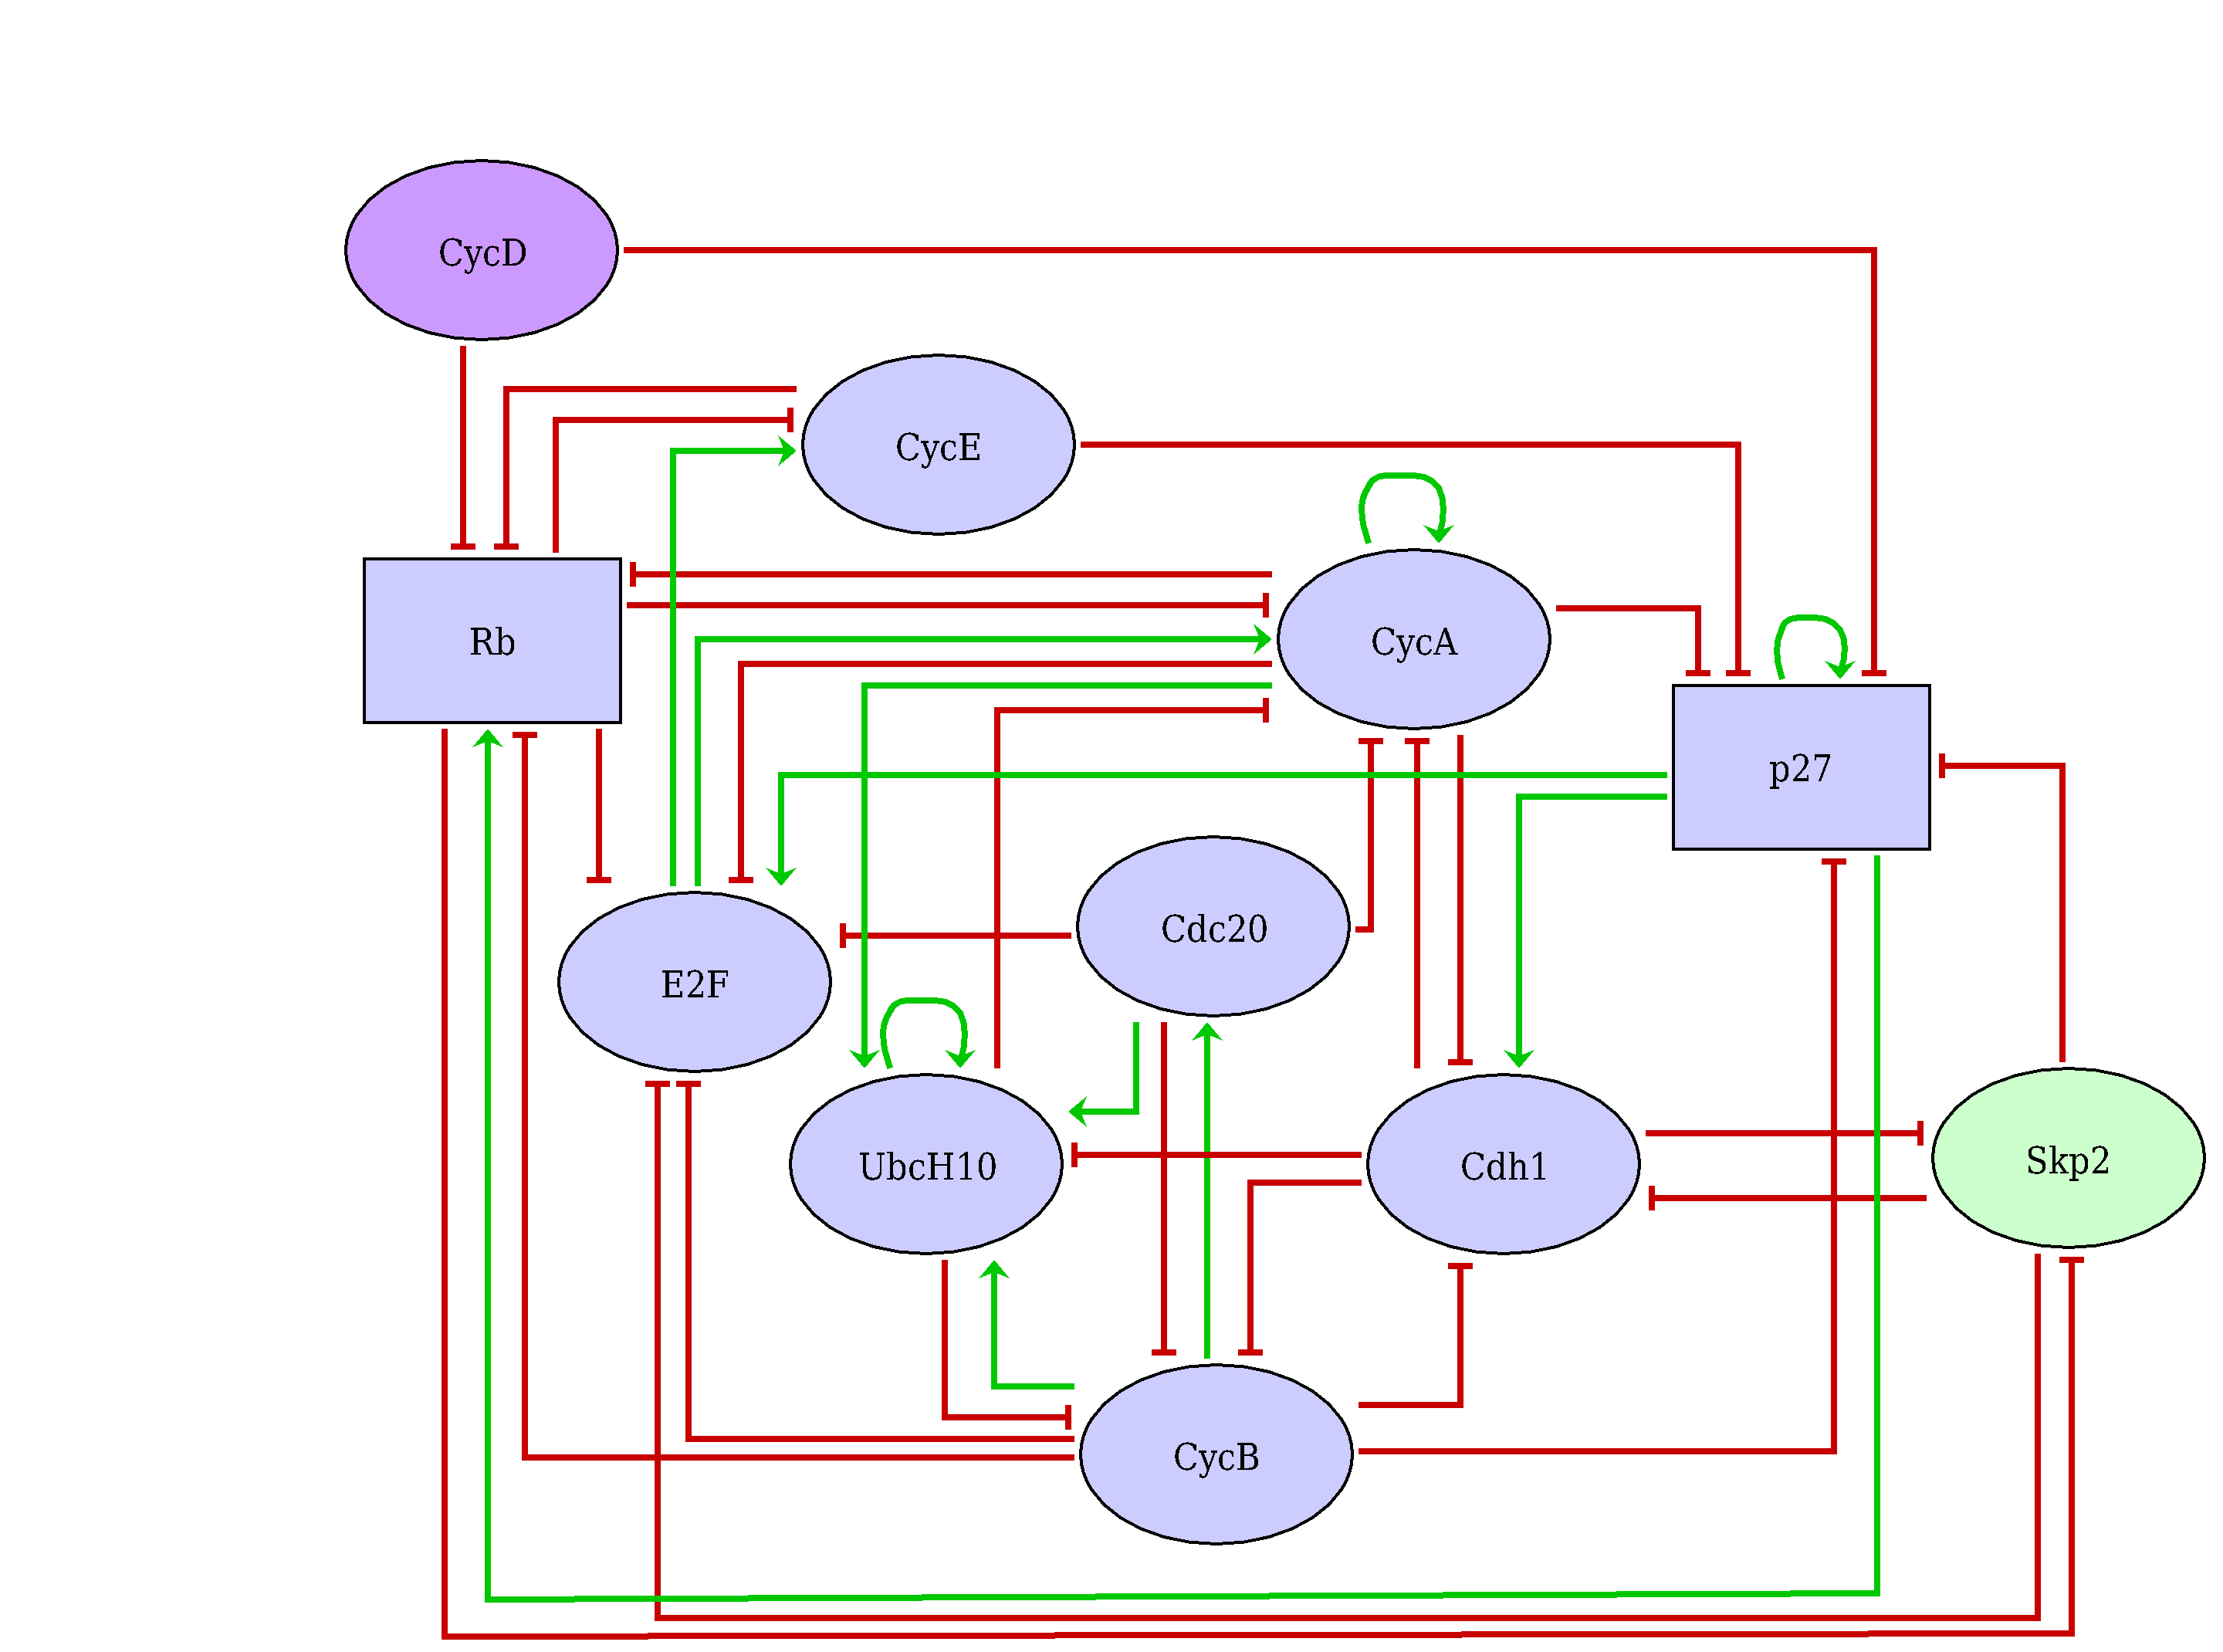

In [4]:
ginsim.show(lrg)

### Identification of stable state (asynchronous)

In [5]:
lqm = ginsim.to_biolqm(lrg)

In [6]:
model = lrg.getModel()

In [7]:
components = model.getComponents

In [8]:
fixpoints = biolqm.fixpoints(lqm)

In [9]:
tabulate(fixpoints)

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |

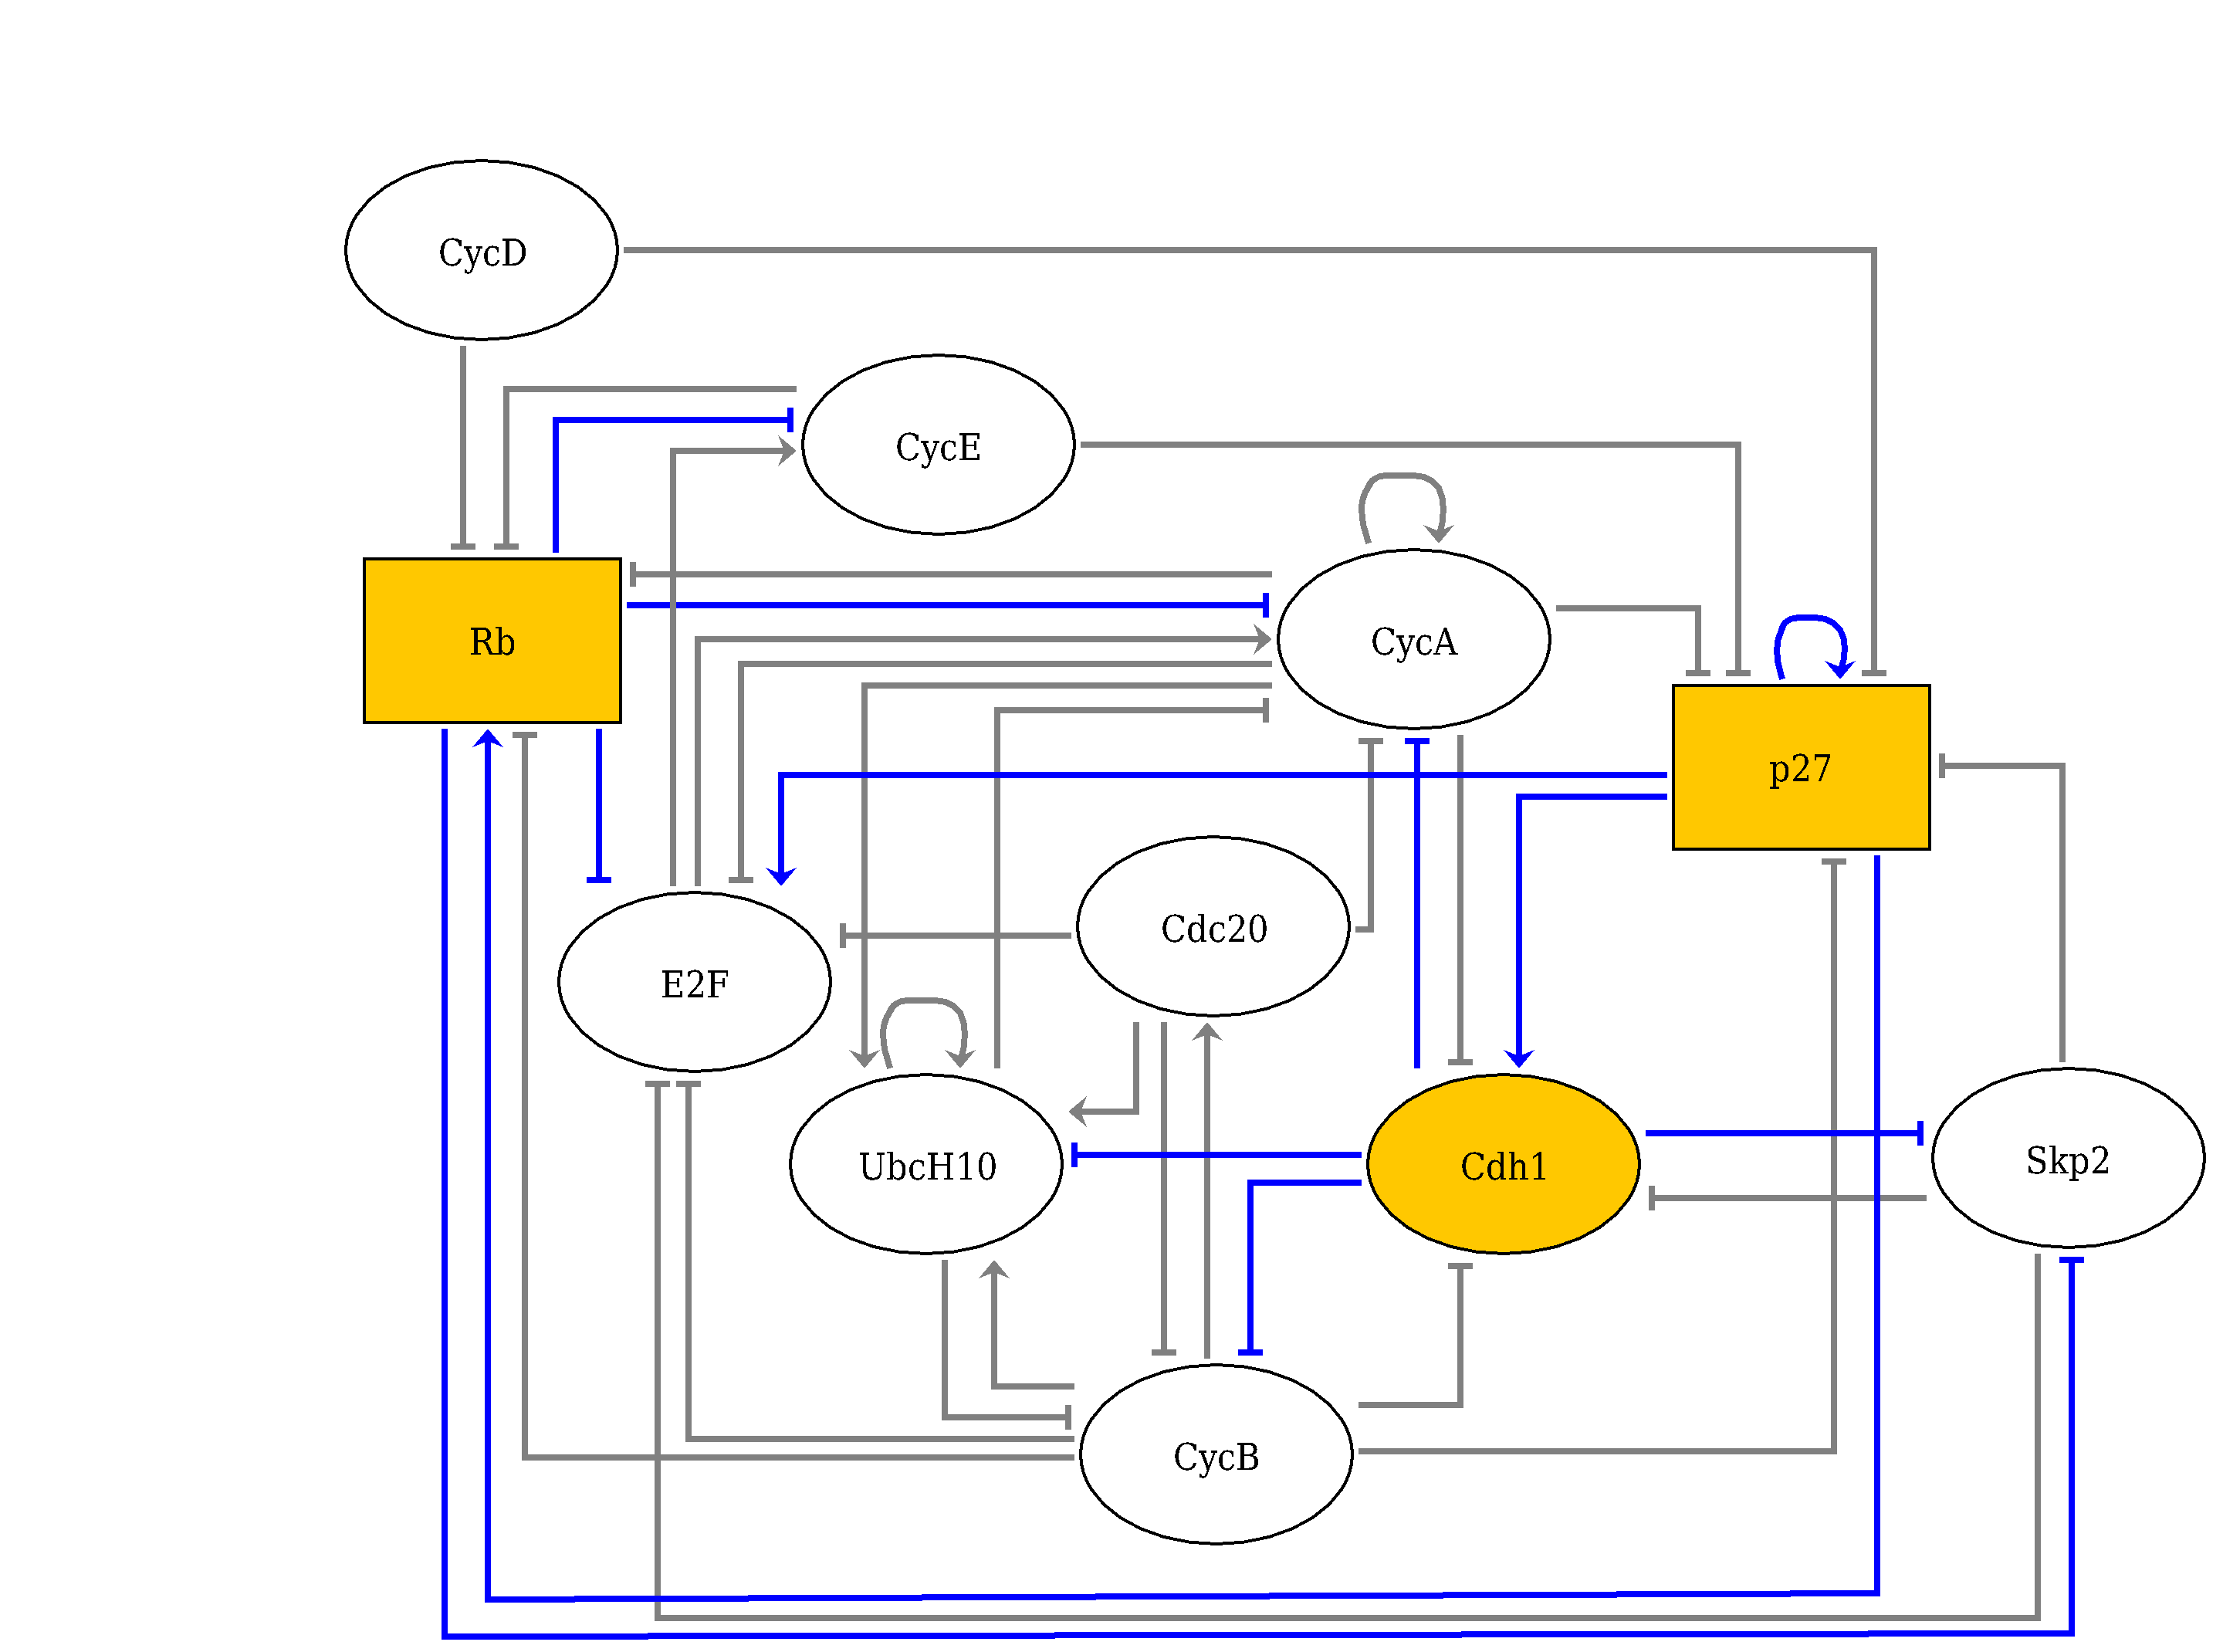

In [10]:
ginsim.show(lrg, fixpoints[0])

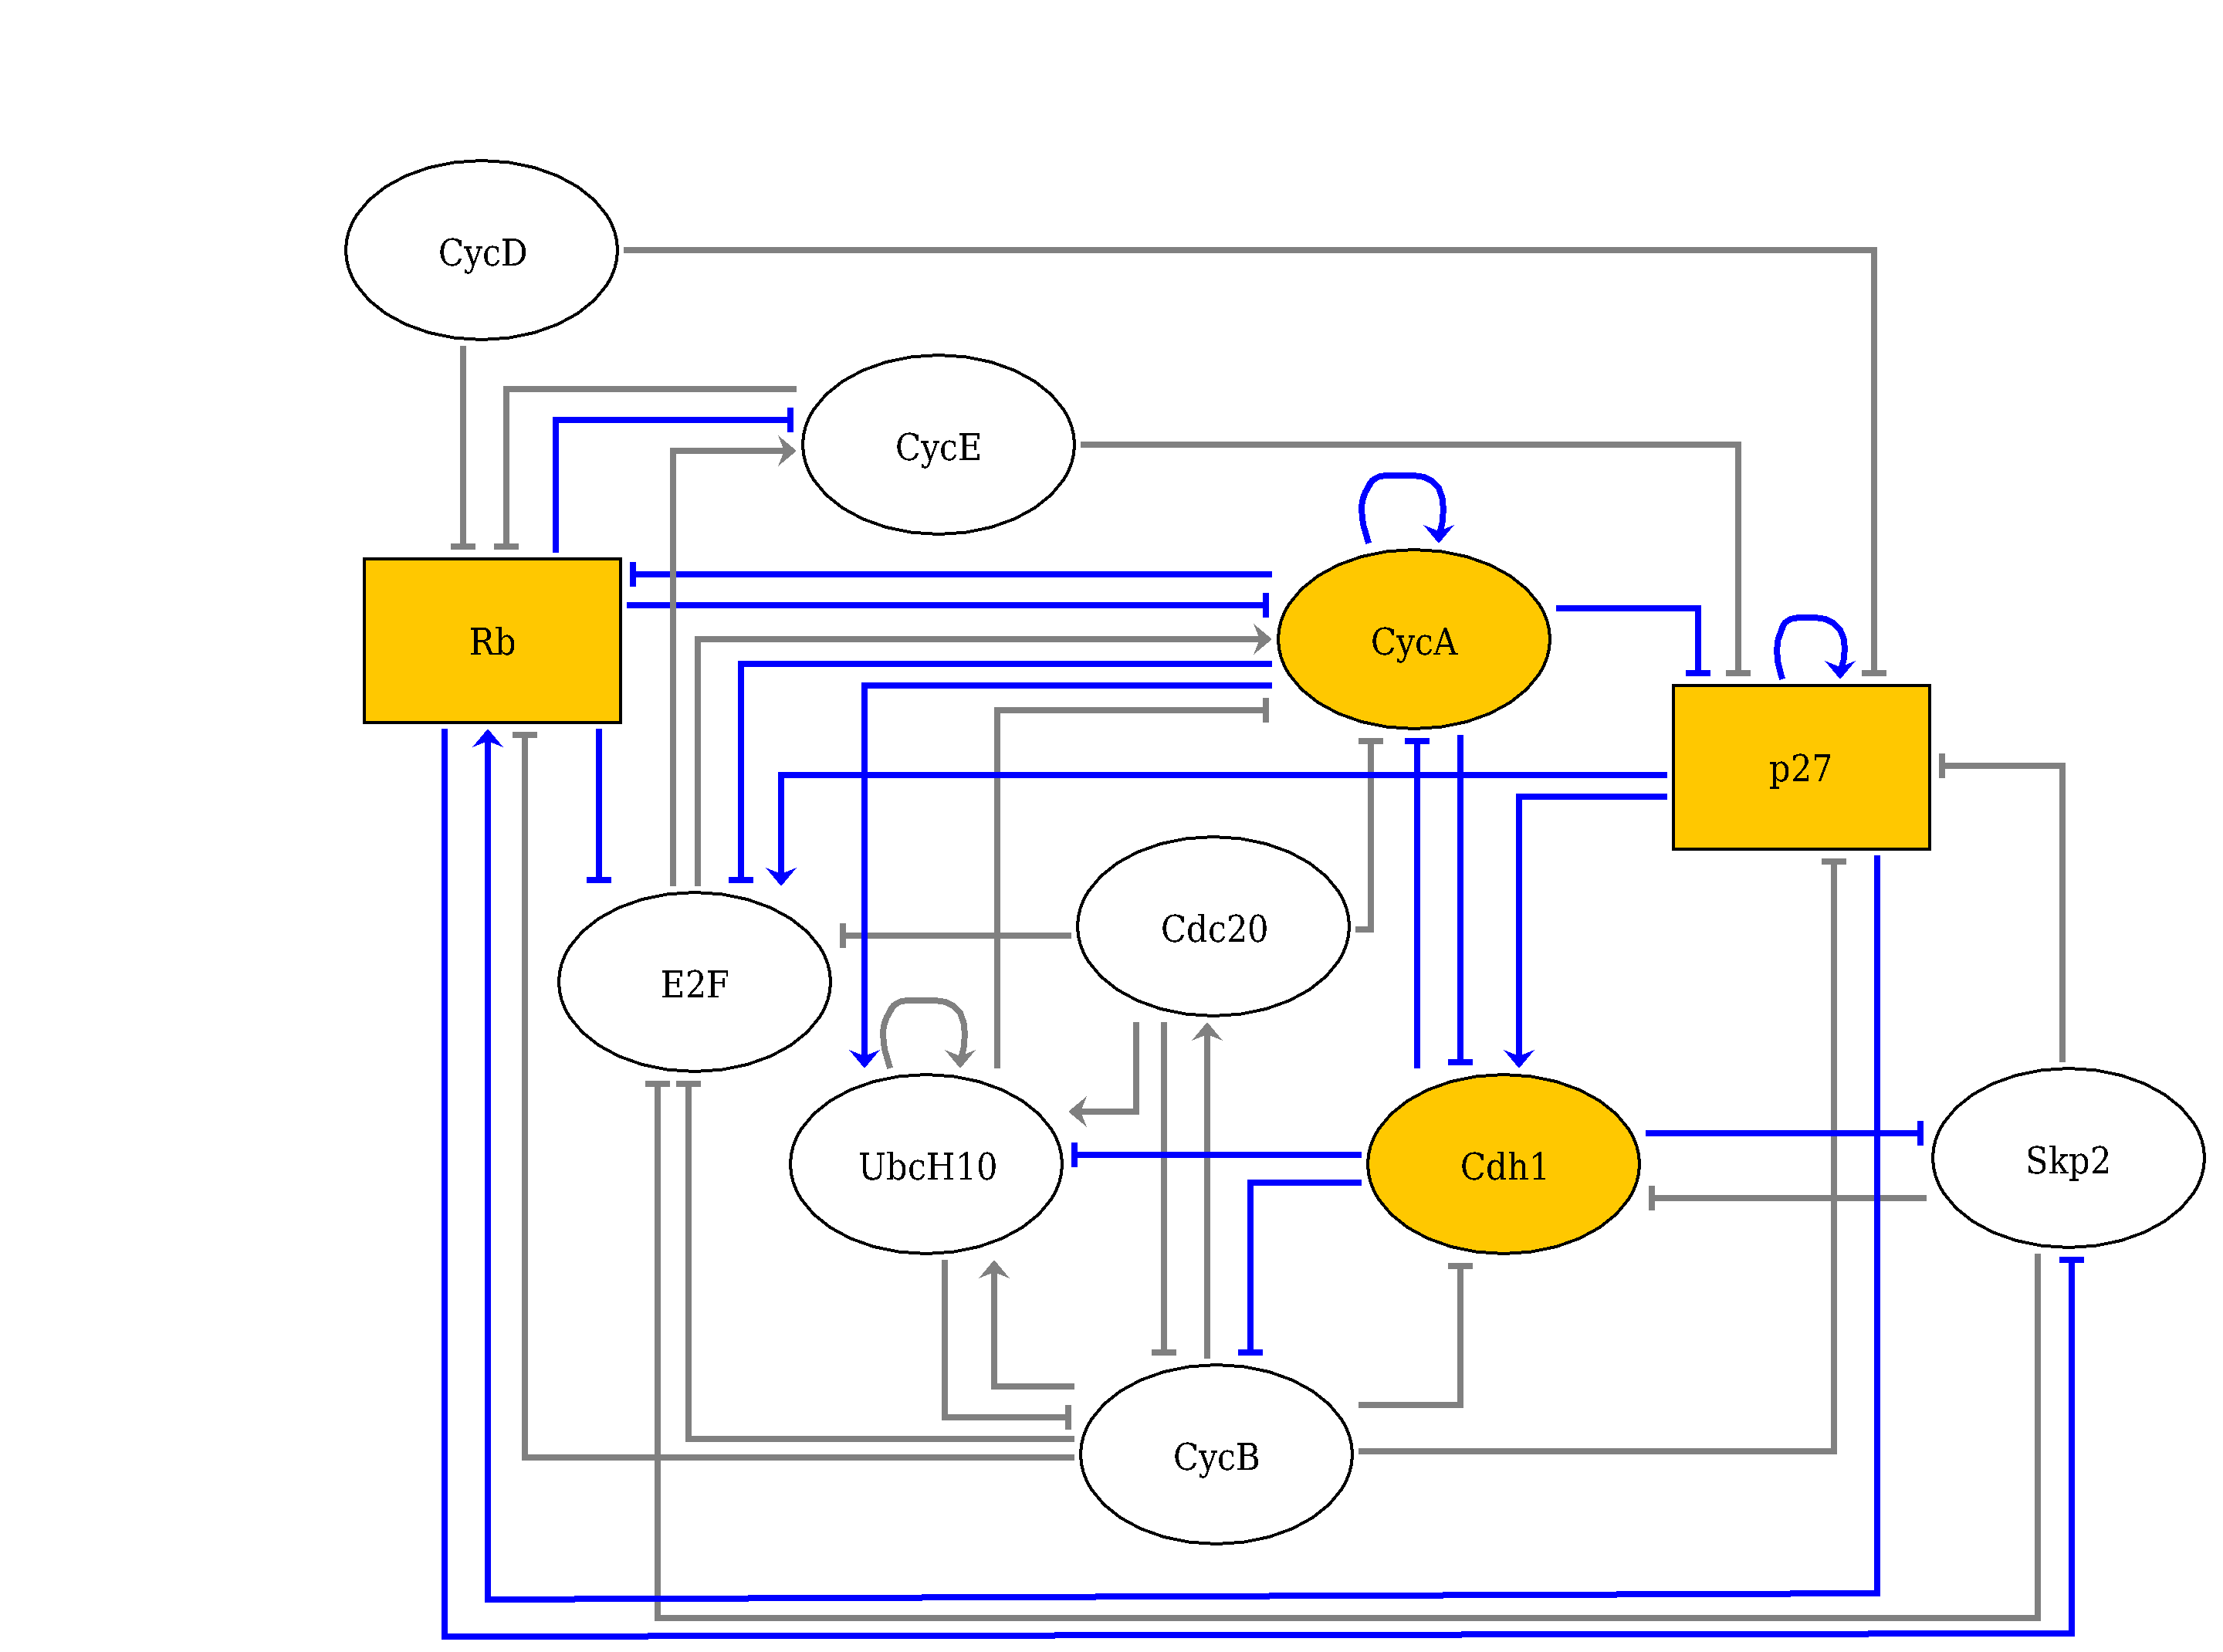

In [11]:
ginsim.show(lrg, fixpoints[1])

In [12]:
ectopic_cyce = biolqm.perturbation(lqm,"CycE%1")

In [13]:
tabulate(biolqm.fixpoints(ectopic_cyce))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      1 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      1 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |

In [14]:
tabulate(fixpoints)

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |

In [15]:
ectopic_p27 = biolqm.perturbation(lqm,"p27%1")

In [16]:
tabulate(biolqm.fixpoints(ectopic_p27))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |

State 0 and 1 are the same (limitation with CycA in the model): we are in the quiescent state:

        1) cycD is inactive so quiscient
        
        2) p27 is active, and Rb is unphosphorylated thus active, thus bound to E2F which doesn't synthesize the cyclins (CycE, cycA, cycB)
        3) all inhibitors are on....
        
        
        
        State 2: CycD is active so we are in cell cycle
        but Rb is phosphorylated, which means it is less bound to e2f so we have production of cyclins but only cycE as we are in early G1. but all other inhibitors are qctive --> cell arrest 

In [17]:
ectopic_p27_cycA = biolqm.perturbation(lqm,"p27%1 CycA%1")

In [19]:
tabulate(biolqm.fixpoints(ectopic_p27_cycA))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     1 |       0 |      1 |        1 |      0 |

In [20]:
ectopic_p27_cycE = biolqm.perturbation(lqm,"p27%1 CycE%1")

In [22]:
tabulate(biolqm.fixpoints(ectopic_p27_cycE))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      1 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |

In [23]:
ectopic_p27_E2F = biolqm.perturbation(lqm,"p27%1 E2F%1")

In [24]:
tabulate(biolqm.fixpoints(ectopic_p27_E2F))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     1 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     1 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |
|  2 |      1 |    1 |     1 |      1 |      0 |      0 |     1 |       0 |      1 |        0 |      1 |

In [25]:
ectopic_Rb2 = biolqm.perturbation(lqm,"Rb%2")

In [27]:
tabulate(biolqm.fixpoints(ectopic_Rb2))

|    |   CycD |   Rb |   E2F |   CycE |   CycA |   CycB |   p27 |   Cdc20 |   Cdh1 |   UbcH10 |   Skp2 |
|---:|-------:|-----:|------:|-------:|-------:|-------:|------:|--------:|-------:|---------:|-------:|
|  0 |      0 |    2 |     0 |      0 |      0 |      0 |     2 |       0 |      1 |        0 |      0 |
|  1 |      0 |    2 |     0 |      0 |      1 |      0 |     2 |       0 |      1 |        0 |      0 |
|  2 |      1 |    2 |     0 |      0 |      0 |      0 |     1 |       0 |      1 |        0 |      0 |
|  3 |      1 |    2 |     0 |      0 |      1 |      0 |     1 |       0 |      1 |        0 |      0 |

In [30]:
ko_Cdh1 = biolqm.perturbation(lqm,"Cdh1%0")

In [32]:
tabulate(biolqm.fixpoints(ko_Cdh1))

In [34]:
pint_ko_cdh1 = biolqm.to_pint(ko_Cdh1)

In [39]:
pint_ko_cdh1.reachable_attractors()

[{'type': 'cyclic',
  'size': 288,
  'sample': {'CycD': 0,
   'Rb': 2,
   'E2F': 0,
   'CycE': 0,
   'CycA': 0,
   'CycB': 0,
   'p27': 2,
   'Cdc20': 0,
   'Cdh1': 0,
   'UbcH10': 1,
   'Skp2': 1}}]

In [40]:
pint_ko_cdh1.count_reachable_states()

918

In [41]:
pint_ko_cdh1.reachable_attractors()

[{'type': 'cyclic',
  'size': 288,
  'sample': {'CycD': 0,
   'Rb': 2,
   'E2F': 0,
   'CycE': 0,
   'CycA': 0,
   'CycB': 0,
   'p27': 2,
   'Cdc20': 0,
   'Cdh1': 0,
   'UbcH10': 1,
   'Skp2': 1}}]

In [43]:
pint_ko_cdh1.fixpoints()

[]